In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM2.5y1', 'PM1y1','NOy1','NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'WSy1', 'ATy1','PM2.5y2', 'PM1y2','NOy2','NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'WSy2', 'ATy2','PM2.5y3', 'PM1y3','NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'WSy3', 'ATy3','year', 'month', 'day']]
Y1 = df['NO']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [149]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=8)

In [17]:
grad_boost = GradientBoostingRegressor(n_estimators=1000,
                                      max_depth=12,
                                      max_features='auto',
                                      min_samples_split=2,
                                      min_samples_leaf=4,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=12, max_features='auto',
                          min_samples_leaf=4, n_estimators=1000)

In [18]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9996920464014738

Score on test data: -0.8837079069359441

Root Mean Squared Error: 43.80652902133137

Overall model accuracy: -0.8837079069359441


In [19]:
test=data.loc['207':'259']
X=test[['PM2.5y1', 'PM1y1','NOy1','NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'WSy1', 'ATy1','PM2.5y2', 'PM1y2','NOy2','NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'WSy2', 'ATy2','PM2.5y3', 'PM1y3','NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'WSy3', 'ATy3','year', 'month', 'day']]

X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,WSy1,ATy1,PM2.5y2,...,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,WSy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,19.845714,0.645714,8.394286,217.428571,...,100.627143,83.730000,212.015714,56.007143,31.830000,1.072857,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,18.558571,0.671429,8.800000,264.292857,...,98.832857,67.225714,194.864286,57.234286,25.420000,0.885714,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,21.981429,0.888571,11.971429,191.864286,...,101.944286,57.842857,190.755714,48.108571,23.871429,0.792857,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,22.795714,0.818571,9.905714,237.660000,...,94.412857,75.028571,195.770000,43.388571,28.211429,0.822857,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,18.811429,0.965714,10.632857,173.172857,...,49.015714,68.434286,127.910000,44.487143,26.552857,0.955714,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,22.227143,1.020000,9.834286,143.550000,...,74.012857,62.091429,156.391429,42.347143,26.207143,1.098571,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,18.641429,1.088571,11.920000,193.068571,...,153.021429,66.960000,268.622857,39.584286,25.985714,1.011429,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,18.934286,0.791429,13.324286,109.957143,...,50.672857,67.874286,129.678571,30.340000,27.005714,1.112857,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,7.574286,1.167143,15.858571,166.732857,...,34.234286,82.401429,120.168571,37.265714,26.588571,1.247143,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,7.415000,0.940000,12.517143,109.975714,...,38.925714,62.438571,108.778571,26.370000,26.894286,1.481429,17.097143,2020,3,1


In [20]:
predict=grad_boost.predict(X)

In [21]:
predict

array([ 75.10879703,  73.4117011 ,  58.59256977,  73.18836724,
        62.3222126 ,  45.78175202,  42.50186227,  66.24058675,
        53.12416818, 108.21019999, 106.00055079,  82.33882541,
        85.90303914,  78.90267521,  61.4938756 ,  53.54938849,
        47.69688364,  45.92900578,  52.20453376,  40.10542565,
        39.23298169,  85.92637342,  79.4290913 ,  30.14509804,
        19.9696107 ,  14.0443559 ,  35.05537471,  17.29034827,
        26.67669142,  14.41790339,  20.14554403,  21.08330444,
        20.23997209,  21.88640419,  28.92414957,  17.52611802,
        25.16018902,  20.79225852,  18.44865907,  88.4481443 ,
       110.04231677,  79.91075414,  71.14512521, 105.57878121,
        94.65246926, 114.47226798, 101.17551708, 109.43449466,
       113.47705618, 116.18487378, 124.57327902,  89.33035669,
       116.77653543])

In [22]:
dates=data.loc['207':'259','From Date']

In [23]:
X['From Date']=dates.values

In [24]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'WSy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'WSy2', 'ATy2', 'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3',
       'SO2y3', 'WSy3', 'ATy3', 'year', 'month', 'day', 'From Date'],
      dtype='object')

In [25]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [26]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [27]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [28]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

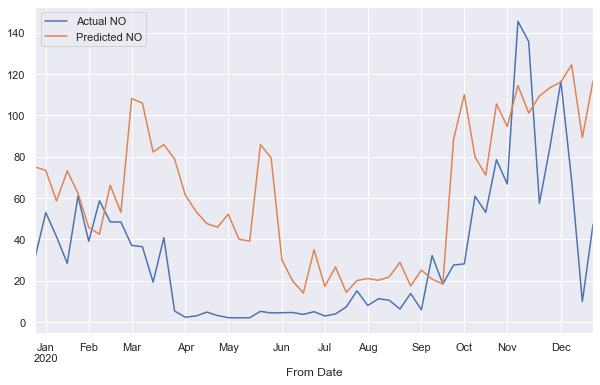

In [29]:
test['NO'].plot(legend=True, label='Actual NO', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO')

In [30]:
np.sqrt(mean_squared_error(test['NO'],X['pred']))

41.28519770175253

In [31]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 33.037576488387714
MSE: 1919.011984896748
RMSE: 43.80652902133137
R-Squared: -0.8837079069359441


In [32]:
mae = metrics.mean_absolute_error(test['NO'],X['pred'])
mse = metrics.mean_squared_error(test['NO'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 33.52900222251205
MSE: 1704.4675492727927
RMSE: 41.28519770175253
R-Squared: -0.4798458970053521


In [33]:
import pickle
filename = 'NO_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [34]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

-0.8837079069359441


# 3rd plot

In [35]:
testcase = pd.DataFrame()

In [36]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [37]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [38]:
testcase

,test,pred,Corrected
155,125.535714,125.468887,169.275416
156,109.870000,191.976975,148.170446
157,84.832857,59.052216,102.858745
158,117.140000,64.392224,108.198753
159,34.865714,55.231020,11.424491
160,47.905714,52.514521,8.707992
161,65.595714,87.782574,43.976045
162,73.142857,43.781158,87.587687
163,68.825714,102.544991,58.738462
164,86.743571,71.446936,115.253465


In [39]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [40]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.6698239197889541

In [41]:
test2020=pd.DataFrame()

In [42]:
test2020['test']=test['NO']
test2020['pred']=X['pred']

In [43]:
test2020.index=test.index

In [44]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

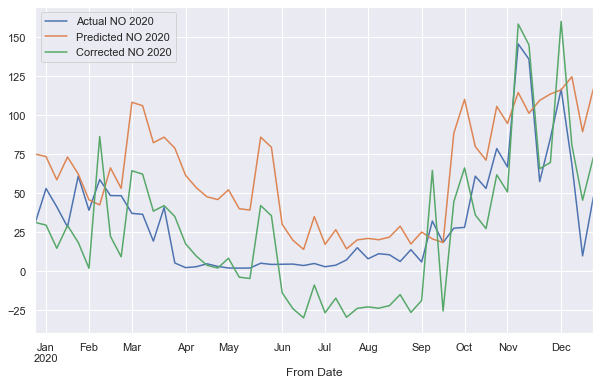

In [45]:
test2020['test'].plot(legend=True, label='Actual NO 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO 2020')

In [46]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.6715479022651643